In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\Ajith\\Desktop\\AV\\1 Iris Data\\iris.txt", header=None )

In [3]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.columns = ['x1', 'x2', 'x3', 'x4', 'y']

In [5]:
data.describe()

,x1,x2,x3,x4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.describe(include = ['O'])

,y
count,150
unique,3
top,Iris-versicolor
freq,50


In [7]:
data['y'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: y, dtype: int64

In [8]:
data.apply(lambda x : len(x.unique()))

x1    35
x2    23
x3    43
x4    22
y      3
dtype: int64

In [9]:
data.apply(lambda x: sum(x.isnull()))

x1    0
x2    0
x3    0
x4    0
y     0
dtype: int64

In [10]:
import seaborn as sns

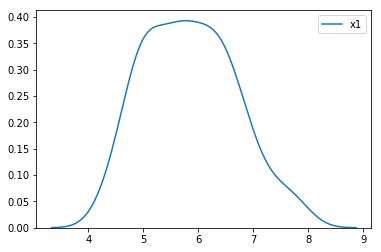

In [11]:
sns.kdeplot(data['x1'])

In [12]:
sns.set(style="ticks")


(0, 1.5)

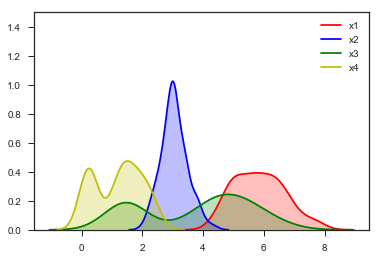

In [13]:
p1=sns.kdeplot(data['x1'], shade=True, color="r")
p1=sns.kdeplot(data['x2'], shade=True, color="b")
p1=sns.kdeplot(data['x3'], shade = True, color = "g")
p1 = sns.kdeplot(data['x4'], shade=True, color = "y")
plt.ylim(0, 1.5)

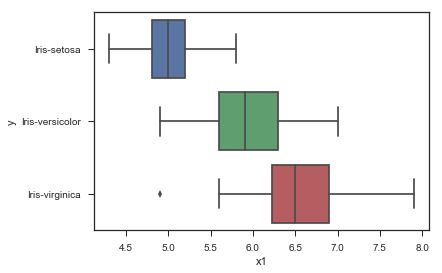

In [14]:
sns.boxplot(x = data['x1'], y = data['y'], data=data)

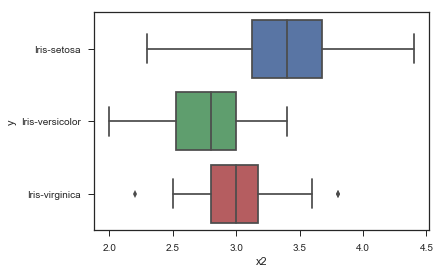

In [15]:
sns.boxplot(x = data['x2'], y = data['y'], data=data)

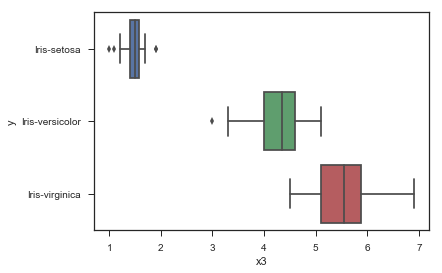

In [16]:
sns.boxplot(x = data['x3'], y = data['y'], data=data)

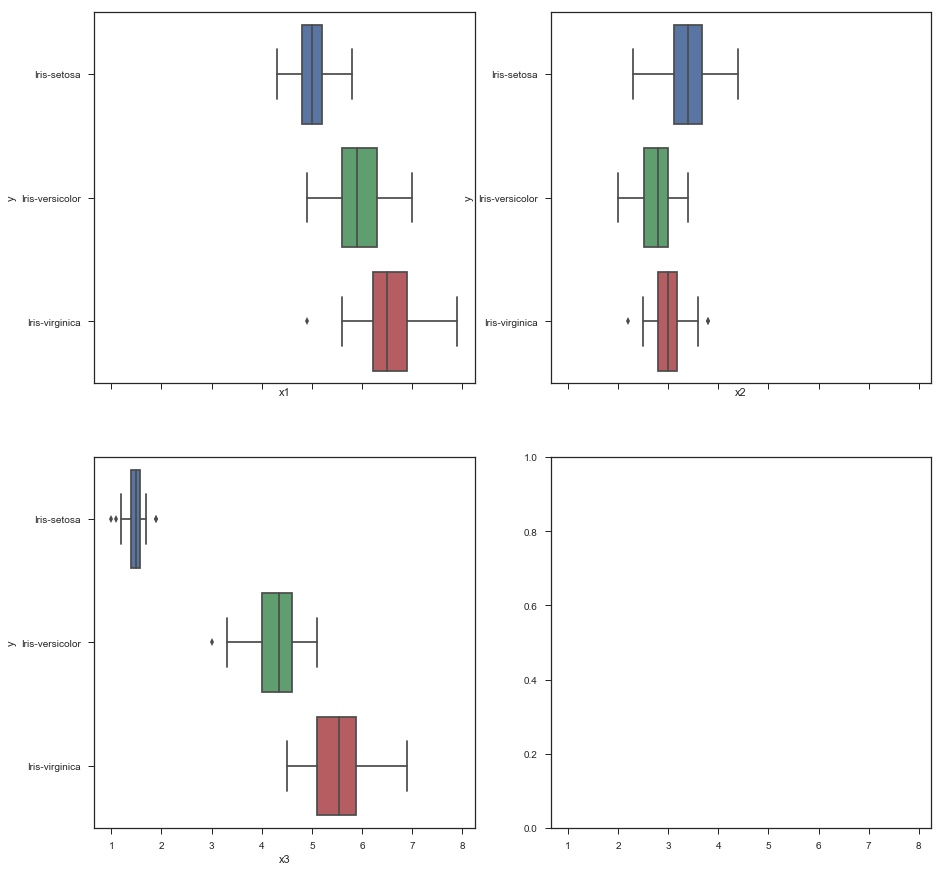

In [17]:
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
sns.boxplot(x = data['x1'], y = data['y'], data=data, ax=axes[0,0])
sns.boxplot(x = data['x2'], y = data['y'], data=data, ax=axes[0,1])
sns.boxplot(x = data['x3'], y = data['y'], data=data, ax=axes[1,0])

There are outliers in x2 and x3

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [18]:
from scipy import stats
z1 = np.abs(stats.zscore(data['x1'][data['y'] == "Iris-versicolor"]))

In [19]:
z1

array([ 2.08225956,  0.90805304,  1.88655848,  0.85325674,  1.10375413,
        0.46185456,  0.71235196,  2.02746326,  1.29945522,  1.44036   ,
        1.83176217,  0.07045239,  0.1252487 ,  0.32094978,  0.65755565,
        1.4951563 ,  0.65755565,  0.26615348,  0.51665087,  0.65755565,
        0.07045239,  0.32094978,  0.71235196,  0.32094978,  0.90805304,
        1.29945522,  1.69085739,  1.4951563 ,  0.1252487 ,  0.46185456,
        0.85325674,  0.85325674,  0.26615348,  0.1252487 ,  1.04895783,
        0.1252487 ,  1.4951563 ,  0.71235196,  0.65755565,  0.85325674,
        0.85325674,  0.32094978,  0.26615348,  1.83176217,  0.65755565,
        0.46185456,  0.46185456,  0.51665087,  1.63606109,  0.46185456])

In [20]:
print(np.where(z1 > 2))
print(np.where(z1 < -2))

(array([0, 7], dtype=int64),)
(array([], dtype=int64),)


In [21]:
Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50

SyntaxError: invalid syntax (<ipython-input-21-973b67788e34>, line 1)

Box plot use the IQR method to display data and outliers(shape of the data) 

In [21]:
Q1 = data['x1'].quantile(0.25)
Q3 = data['x1'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.3000000000000007


In [22]:
#print ((data['x1'] < (Q1 - 1.5*IQR)) | (data['x1'] > (Q3 + 1.5*IQR)))
data[(data['x1'] < (Q1 - 1.5*IQR)) | (data['x1'] > (Q3 + 1.5*IQR))]

,x1,x2,x3,x4,y


In [23]:
there are no outliers in x1

SyntaxError: invalid syntax (<ipython-input-23-e15a3e974878>, line 1)

In [24]:
Q1 = data['x1'][data['y'] == "Iris-virginica"].quantile(0.25)
Q3 = data['x1'][data['y'] == "Iris-virginica"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.6749999999999998


In [25]:
data[(data['x1'] < (Q1 - 1.5*IQR)) | (data['x1'] > (Q3 + 1.5*IQR))]

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa


In [26]:
data.describe()

,x1,x2,x3,x4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


we have drawn IQR for Virginca, so change the ourlier for the virgina to mean value in the same category 

In [27]:
#taking the copy of data just to compare results before and after handling outliers
data1 = data.copy()

In [28]:
data[data.index == 106]

,x1,x2,x3,x4,y
106,4.9,2.5,4.5,1.7,Iris-virginica


In [29]:
data.iloc[106]

x1               4.9
x2               2.5
x3               4.5
x4               1.7
y     Iris-virginica
Name: 106, dtype: object

In [30]:
from statistics import mean
data['x1'].iloc[106] = mean( data['x1'][data['y'] =="Iris-virginica"])
data.iloc[106]

C:\Users\Ajith\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


x1             6.588
x2               2.5
x3               4.5
x4               1.7
y     Iris-virginica
Name: 106, dtype: object

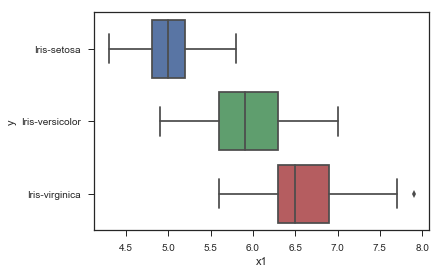

In [31]:
sns.boxplot(x = data['x1'], y = data['y'], data=data)

this outlier wont effct much because the distribution is towrds right side

#outliers of x2

for x2 iris virginica has outliers

In [32]:
Q1 = data['x2'][data['y'] == "Iris-virginica"].quantile(0.25)
Q3 = data['x2'][data['y'] == "Iris-virginica"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.37500000000000044


In [33]:
data[(data['x2'] < (Q1 - 1.5*IQR)) | (data['x2'] > (Q3 + 1.5*IQR))]

,x1,x2,x3,x4,y
5,5.4,3.9,1.7,0.4,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa


In [34]:
data['x2'][(data['x2'] < (Q1 - 1.5*IQR)) | (data['x2'] > (Q3 + 1.5*IQR))][data['y'] =="Iris-virginica"]

117    3.8
119    2.2
131    3.8
Name: x2, dtype: float64

In [35]:
data['x2'].iloc[117] = mean(data['x2'][data['y']=="Iris-virginica"])
data['x2'].iloc[119] = mean(data['x2'][data['y']=="Iris-virginica"])
data['x2'].iloc[131] = mean(data['x2'][data['y']=="Iris-virginica"])

C:\Users\Ajith\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
 mean(data['x2'][data['y']=="Iris-virginica"])

2.9560821920000002

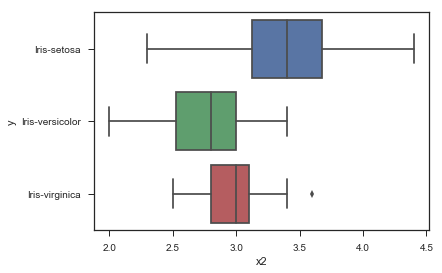

In [37]:
sns.boxplot(x = data['x2'], y = data['y'], data=data)

In [38]:
data[data["x2"] > 3.5]

,x1,x2,x3,x4,y
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa


In [46]:
data['x2'].iloc[109] = mean(data['x2'][data["y"] == "Iris-virginica"])

C:\Users\Ajith\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


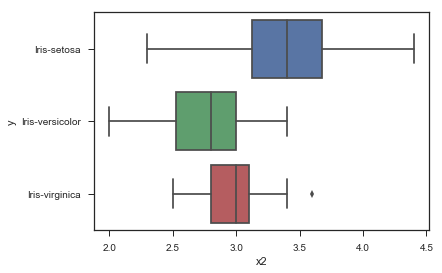

In [39]:
sns.boxplot(x = data['x2'], y = data['y'], data=data)

#x3 Analysis

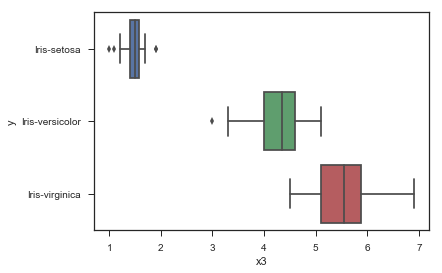

In [40]:
sns.boxplot(x = data['x3'], y = data['y'], data=data)

outliers in Iris-setosa ,Iris-versicolor

In [41]:
Q1 = data['x3'][data['y'] == "Iris-setosa"].quantile(0.25)
Q3 = data['x3'][data['y'] == "Iris-setosa"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.17500000000000027


In [73]:
#data[(data['x3'] < (Q1 - 1.5*IQR)) | (data['x3'] > (Q3 + 1.5*IQR))]

In [42]:
data['x3'][(data['x3'] < (Q1 - 1.5*IQR)) ][data['y'] =="Iris-setosa"]

13    1.1
22    1.0
Name: x3, dtype: float64

In [43]:
data['x3'][(data['x3'] > (Q1 + 1.5*IQR)) ][data['y'] =="Iris-setosa"]

5     1.7
18    1.7
20    1.7
23    1.7
24    1.9
44    1.9
Name: x3, dtype: float64

In [44]:
data['x3'].iloc[13] = mean(data['x3'][data['y']=="Iris-setosa"])
data['x3'].iloc[22] = mean(data['x3'][data['y']=="Iris-setosa"])
data['x3'].iloc[5] = mean(data['x3'][data['y']=="Iris-setosa"])
data['x3'].iloc[18] = mean(data['x3'][data['y']=="Iris-setosa"])
data['x3'].iloc[20] = mean(data['x3'][data['y']=="Iris-setosa"])
data['x3'].iloc[23] = mean(data['x3'][data['y']=="Iris-setosa"])
data['x3'].iloc[24] = mean(data['x3'][data['y']=="Iris-setosa"])
data['x3'].iloc[44] = mean(data['x3'][data['y']=="Iris-setosa"])

C:\Users\Ajith\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


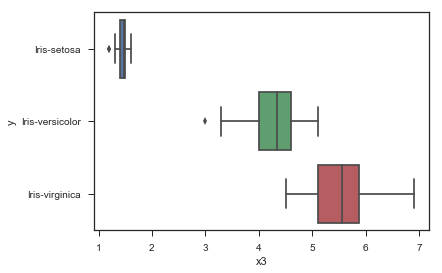

In [45]:
sns.boxplot(x = data['x3'], y = data['y'], data=data)

In [46]:
Q1 = data['x3'][data['y'] == "Iris-versicolor"].quantile(0.25)
Q3 = data['x3'][data['y'] == "Iris-versicolor"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.5999999999999996


In [47]:
#data[(data['x3'] < (Q1 - 1.5*IQR)) | (data['x3'] > (Q3 + 1.5*IQR))]

In [48]:
data[(data['x3'] < (Q1 - 1.5*IQR))][data['y'] =="Iris-versicolor"]

C:\Users\Ajith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,x1,x2,x3,x4,y
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [49]:
data[(data['x3'] > (Q1 + 1.5*IQR))][data['y'] =="Iris-versicolor"]

C:\Users\Ajith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,x1,x2,x3,x4,y
52,6.9,3.1,4.9,1.5,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor


In [50]:
data['x3'].iloc[98] = mean(data['x3'][data['y']=="Iris-versicolor"])
data['x3'].iloc[52] = mean(data['x3'][data['y']=="Iris-versicolor"])
data['x3'].iloc[72] = mean(data['x3'][data['y']=="Iris-versicolor"])
data['x3'].iloc[77] = mean(data['x3'][data['y']=="Iris-versicolor"])
data['x3'].iloc[83] = mean(data['x3'][data['y']=="Iris-versicolor"])

C:\Users\Ajith\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


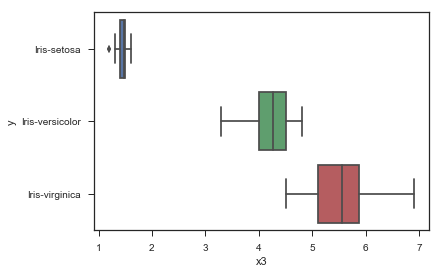

In [51]:
sns.boxplot(x=data['x3'], y = data['y'])

Analysis on x4

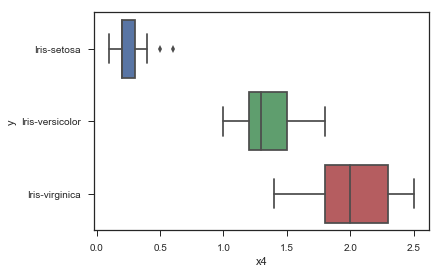

In [52]:
sns.boxplot(x= data['x4'], y = data['y'])

In [53]:
Q1 = data['x4'][data['y'] == "Iris-setosa"].quantile(0.25)
Q3 = data['x4'][data['y'] == "Iris-setosa"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.09999999999999998


In [54]:
data[(data['x4'] < (Q1 - 1.5*IQR))][data['y'] =="Iris-setosa"]

C:\Users\Ajith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,x1,x2,x3,x4,y


In [55]:
data[(data['x4'] > (Q1 + 1.5*IQR))][data['y'] =="Iris-setosa"]

C:\Users\Ajith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,x1,x2,x3,x4,y
5,5.4,3.9,1.480706,0.4,Iris-setosa
15,5.7,4.4,1.500000,0.4,Iris-setosa
16,5.4,3.9,1.300000,0.4,Iris-setosa
21,5.1,3.7,1.500000,0.4,Iris-setosa
23,5.1,3.3,1.467283,0.5,Iris-setosa
26,5.0,3.4,1.600000,0.4,Iris-setosa
31,5.4,3.4,1.500000,0.4,Iris-setosa
43,5.0,3.5,1.600000,0.6,Iris-setosa
44,5.1,3.8,1.453881,0.4,Iris-setosa


In [56]:
data['x4'].iloc[5] = mean(data['x4'][data['y']=="Iris-setosa"])
data['x4'].iloc[15] = mean(data['x4'][data['y']=="Iris-setosa"])
data['x4'].iloc[16] = mean(data['x4'][data['y']=="Iris-setosa"])
data['x4'].iloc[21] = mean(data['x4'][data['y']=="Iris-setosa"])
data['x4'].iloc[23] = mean(data['x4'][data['y']=="Iris-setosa"])
data['x4'].iloc[26] = mean(data['x4'][data['y']=="Iris-setosa"])
data['x4'].iloc[31] = mean(data['x4'][data['y']=="Iris-setosa"])
data['x4'].iloc[43] = mean(data['x4'][data['y']=="Iris-setosa"])
data['x4'].iloc[44] = mean(data['x4'][data['y']=="Iris-setosa"])

C:\Users\Ajith\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


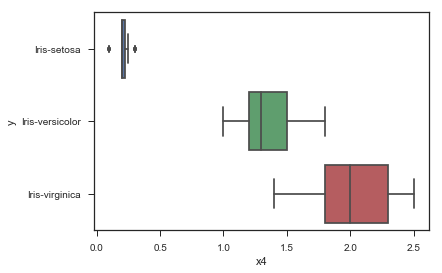

In [57]:
sns.boxplot(x= data['x4'], y= data['y'])

In [58]:
from sklearn.cross_validation import train_test_split

C:\Users\Ajith\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
data.describe()

,x1,x2,x3,x4
count,150.000000,150.000000,150.000000,150.000000
mean,5.854587,3.048027,3.741813,1.186440
std,0.826629,0.419229,1.760874,0.776756
min,4.300000,2.000000,1.200000,0.100000
25%,5.100000,2.800000,1.500000,0.227108
50%,5.800000,3.000000,4.266633,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [61]:
data['y'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: y, dtype: int64

In [ ]:
y = data['y']
del data['y']
x = data

In [65]:
print(y.shape)
print(x.shape)

(150,)
(150, 4)


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
y_pred = log_reg.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[12  0  0]
 [ 0 10  1]
 [ 0  0  7]]


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.88      1.00      0.93         7

    avg / total       0.97      0.97      0.97        30



In [75]:
#Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [79]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [81]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_pred, y_test)
print(cnf)

[[12  0  0]
 [ 0 10  0]
 [ 0  1  7]]


In [82]:
#randomForest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
print(clf.feature_importances_)

[ 0.06946914  0.01990818  0.41891297  0.49170972]


In [84]:
y_pred = clf.predict(x_test)
confusion_matrix(y_pred, y_test)

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  7]], dtype=int64)

In [85]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.966666666667


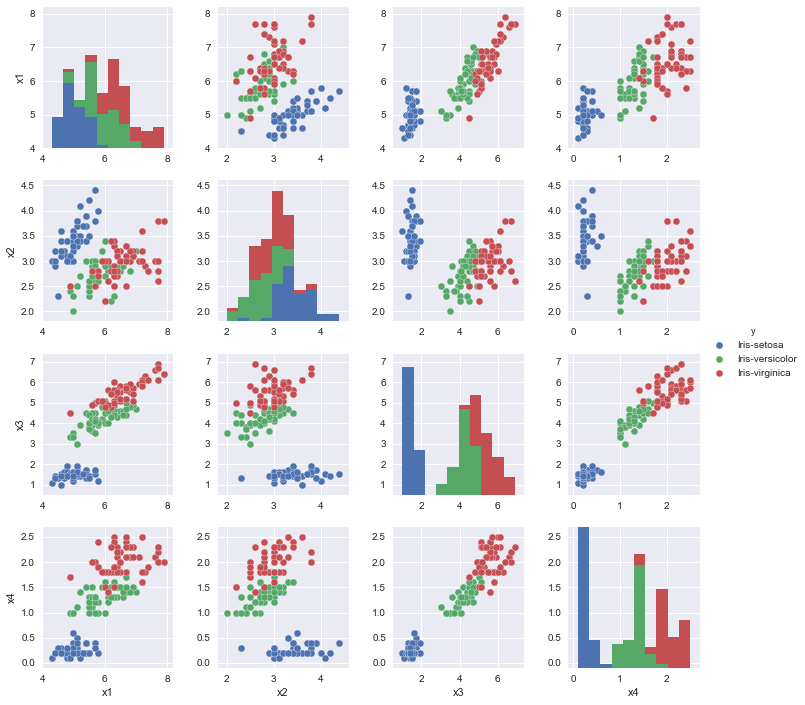

In [103]:
sns.pairplot(data1, hue='y', size=2.5);

In [92]:
sns.set()